In [2]:
#  라이브러리 로드 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 
train = pd.read_csv("./data/train.csv")

In [3]:
train.dropna(axis=0, inplace=True)

In [4]:
train.isna().sum().sum()

0

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

# EDA & 데이터 전처리

- 데이터 확인 
- 기술통계 확인 
- 결측치 확인 & 처리
- 무한대 값, 중복된는 값 확인 & 처리 
- 이상치 확인 & 처리
- 변수간 상관관계 분석
- 데이터 스케일링
---

## 데이터 확인

    데이터 행 열 수 확인 
    df.shape

    데이터 컬럼명 확인
    df.columns

    데이터 컬럼별 정보 확인 (데이터 타입, non-null의 수)
    df.info()



In [3]:
# 데이터 확인 

print(train.shape)
print(train.columns)
print(train.info())


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<Axes: >

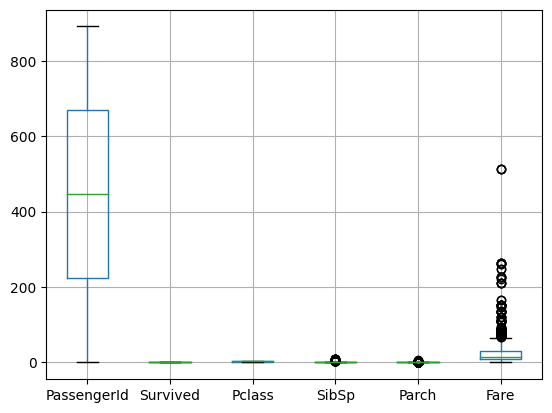

In [31]:
# 시각화를 통한 데이터 확인

# train["Fare"].hist()

# train["Fare"].plot(kind="bar")

train.boxplot()

# plt.boxplot(train["Fare"])

---
## 데이터의 기술 통계량 확인

    df.describe()

- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 

In [10]:
# 데이터 기술 통계량 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 문자열 데이터 확인
train["Embarked"].value_counts(property)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

---
## 결측치 확인 & 처리

    전체 결측치 확인 
    df.isna().sum().sum()

    컬럼별 결측치 확인 
    df.isna().sum()

    결측치 데이터 데이터프레임 형식으로 보기
    df[df.isna().any(axis=1)]
    
    삭제
    df.dropna(axis = 0, inplace = True)
    
    대체(중앙값, 평균값, 최빈값)
    df.fillna("", inplace = True)

    최빈값
    from statistics import mode
    mode(df[col])

In [12]:
# 결츨치 확인
# df.shape
print(train.isna().sum().sum())

866


In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [21]:
# 결측치 처리
#  df.shape
#  Age는 평균값 cabin는  최빈값으로 Embarked의 결측치는 삭제해봅시다! 

train["Age"].fillna(train["Age"].mean,inplace=True )

from statistics import mode
train["Cabin"].fillna(mode(train["Cabin"]), inplace=True)

train["Embarked"].dropna(axis=0, inplace=True)

In [22]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

---
## 무한대 값 확인 
df[df.isin(np.abs([np.inf])).any(axis=1)]

In [26]:
# 데이터 무한대값 확인

train[train.isin([np.inf]).any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [66]:
# 무한대 값을 가지는 데이터 처리
# df.shape

--- 
## 이상치 확인 & 처리 

### IQR을 이용한 이상치 확인 & 처리


    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index

In [63]:
train_1 = train.copy()
len(train["Fare"])

891

In [34]:
win = train_1.select_dtypes(exclude="object")


quantile_25 = np.percentile(win["Fare"].values, 25)
quantile_75 = np.percentile(win["Fare"].values, 75)

IQR = quantile_75 - quantile_25
IQR_weight = IQR*1.5
  
lowest = quantile_25 - IQR_weight
highest = quantile_75 + IQR_weight
    
outlier_idx = win["Fare"][ (win["Fare"] < lowest) | (win["Fare"] > highest) ].index


In [36]:





train_1.drop(index=outlier_idx, axis=0, inplace=True)
len(train_1["Fare"])

775

{'whiskers': [<matplotlib.lines.Line2D at 0x14c6ca55090>,
 'caps': [<matplotlib.lines.Line2D at 0x14c6ca554b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c6ca54df0>],
 'medians': [<matplotlib.lines.Line2D at 0x14c6ca559c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c6ca55c60>],
 'means': []}

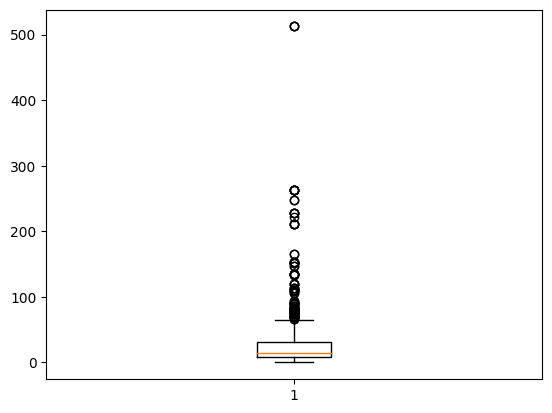

In [40]:
plt.boxplot(train["Fare"])

In [42]:
np.argmax(train["Fare"])

258

In [43]:
train.loc[258,:]

PassengerId                                                  259
Survived                                                       1
Pclass                                                         1
Name                                            Ward, Miss. Anna
Sex                                                       female
Age                                                         35.0
SibSp                                                          0
Parch                                                          0
Ticket                                                  PC 17755
Fare                                                    512.3292
Cabin          <bound method NDFrame._add_numeric_operations....
Embarked                                                       C
Name: 258, dtype: object

In [73]:
train_1 = train.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x14c6d1d2530>,
 'caps': [<matplotlib.lines.Line2D at 0x14c6d1d2a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c6d1d2290>],
 'medians': [<matplotlib.lines.Line2D at 0x14c6d1d2fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c6d1d3250>],
 'means': []}

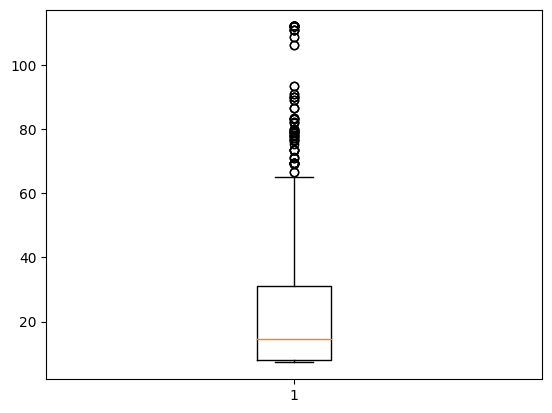

In [77]:
train_1 = train.copy()
quantile_5 = np.percentile(train_1["Fare"].values, 99.5)
quantile__5 = np.percentile(train_1["Fare"].values, 0.5)

train_1[train_1["Fare"]>quantile_5] = quantile_5
train_1[train_1["Fare"]<quantile__5] = quantile__5

plt.boxplot(train_1["Fare"])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c6d0e8dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x14c6d00ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c6d0e8b20>],
 'medians': [<matplotlib.lines.Line2D at 0x14c6d0e92a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c6d0e9540>],
 'means': []}

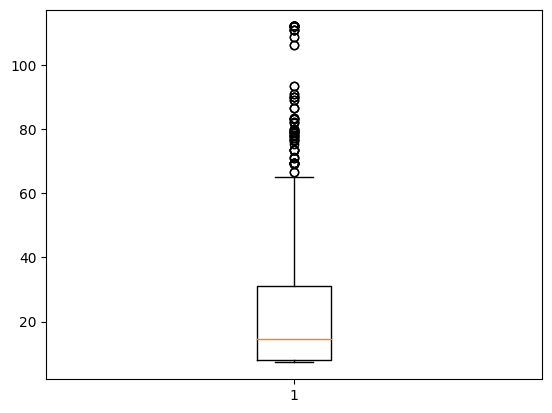

In [80]:
train_1 = train.copy()

quantile_5 = np.percentile(train_1["Fare"].values, 99.5)
quantile__5 = np.percentile(train_1["Fare"].values, 0.5)

train_1[train_1["Fare"]>quantile_5]["Fare"].replace(quantile_5)
train_1[train_1["Fare"]<quantile__5]["Fare"].replace(quantile__5)


plt.boxplot(train_1["Fare"])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c6d062ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x14c6d0632e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c6d062c20>],
 'medians': [<matplotlib.lines.Line2D at 0x14c6d063820>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c6d063ac0>],
 'means': []}

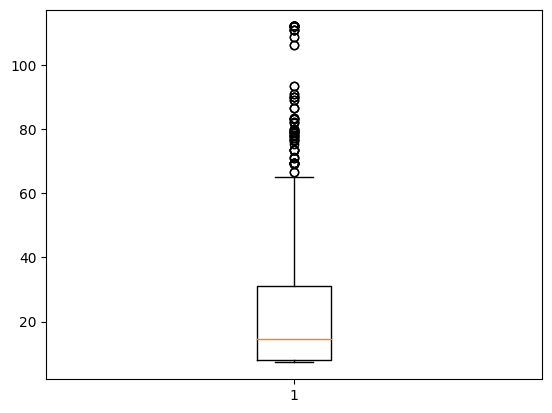

In [79]:
train_1 = train.copy()

quantile_5 = np.percentile(train_1["Fare"].values, 99.5)
quantile__5 = np.percentile(train_1["Fare"].values, 0.5)


for i in train_1.index:
    if train.loc[i, "Fare"] > quantile_5:
        train.loc[i, "Fare"] = quantile_5
    elif train.loc[i, "Fare"] < quantile__5:
        train.loc[i, "Fare"] = quantile__5
    else:
        pass

plt.boxplot(train_1["Fare"])

---
### 윈저라이징 (Winsorizing)
### 이상치를 제거하는 대신 이상치 값을 분포의 상/하한값으로 대체하는 방식

plt.boxplot(df[col])

    from scipy.stats.mstats  import winsorize
    winsorize(df[col],limits=[0.005, 0.005])

plt.boxplot(df[col])

In [48]:
from scipy.stats.mstats import winsorize

train_1["Fare"] =  winsorize(train_1["Fare"], limits=[0.05, 0.05])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c6cc2a9e0>,
 'caps': [<matplotlib.lines.Line2D at 0x14c6cc2af20>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c6cc2a740>],
 'medians': [<matplotlib.lines.Line2D at 0x14c6cc2b460>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c6cc2b700>],
 'means': []}

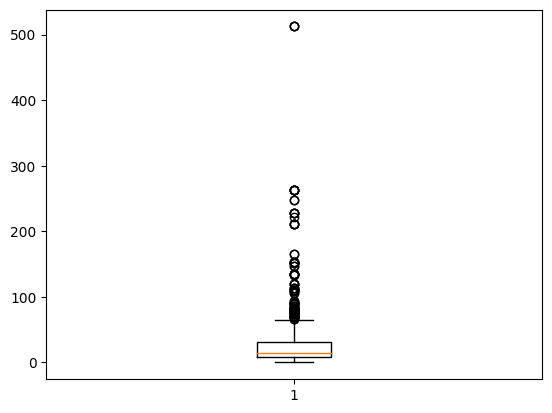

In [46]:
plt.boxplot(train["Fare"])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c6ccf3ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x14c6cd1c460>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c6ccf2b00>],
 'medians': [<matplotlib.lines.Line2D at 0x14c6cd1c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c6cd1cc40>],
 'means': []}

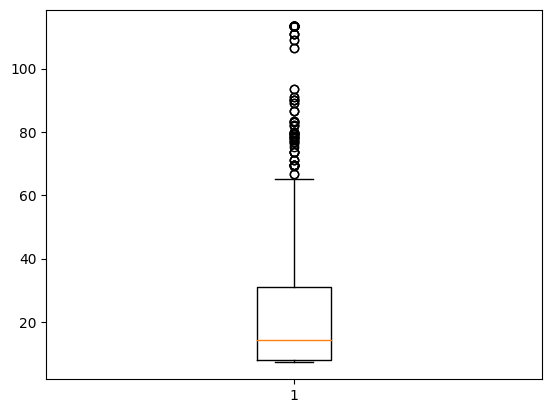

In [49]:
plt.boxplot(train_1["Fare"])

---
### isolation forest



![Untitled](https://github.com/juno-bara/Ubion_Hackathon/assets/124761676/91a51b10-6bd1-4b36-8b6f-5aa5e9b94c4a)



    from sklearn.ensemble import IsolationForest

    clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
    clf.fit(df)

    이상치가 아닌 값 추출해서 데이터프레임 
    sklearn에서는 predic를 한 결과는 이상치는 -1, 정상치는 1로 반환하여 리턴해줌
    isol_df = df[clf.predict(df) != -1]



In [9]:
train_1 = train.copy()
train_1 = train_1.select_dtypes("float")

In [12]:
train.select_dtypes("float").shape

(183, 2)

In [11]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(train_1)

# 이상치가 아닌 값 추출해서 데이터프레임 
# sklearn에서는 predic를 한 결과는 이상치는 -1, 정상치는 1로 반환하여 리턴해줌
isol_train = train_1[clf.predict(train_1) != -1]
isol_train

c:\Users\leeju\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500
...,...,...
871,47.0,52.5542
872,33.0,5.0000
879,56.0,83.1583
887,19.0,30.0000


---
### KMeans


    # KMeans 클러스터링을 이용해서 이상치 제거 (for문을 통해 n_clusters=13 도출)
    from sklearn.cluster import KMeans
    clf = KMeans(n_clusters=2, random_state=156)
    clf.fit(df)
    df[clf.predict(df)==0]

    # 군집화 평가를 위해 실루엣 계수 이용
    from sklearn.metrics import silhouette_score
    clf = KMeans(n_clusters=2, random_state=156)
    clf.fit(df_수치)
    df_km = df_수치[clf.predict(df_수치)==0]
    label = clf.labels_
    score_samples = silhouette_score(df_수치,label)
    print('silhouette:',score_samples)

In [14]:
train.select_dtypes("float").shape

(183, 2)

In [21]:
# KMeans 클러스터링을 이용해서 이상치 제거 
train_1 = train.copy()
train_1 = train_1.select_dtypes("float")

# KMeans 클러스터링을 이용해서 이상치 제거 (for문을 통해 n_clusters=13 도출)
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=156)
clf.fit(train_1)
train_1[clf.predict(train_1)==0]



c:\Users\leeju\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500
...,...,...
871,47.0,52.5542
872,33.0,5.0000
879,56.0,83.1583
887,19.0,30.0000


In [15]:
# 군집화 평가를 위해 실루엣 계수 이용

from sklearn.metrics import silhouette_score
clf = KMeans(n_clusters=2, random_state=156)
clf.fit(train_1.select_dtypes("float"))
df_km = train_1.select_dtypes("float")[clf.predict(train_1.select_dtypes("float"))==0]
label = clf.labels_
score_samples = silhouette_score(train_1.select_dtypes("float"),label)
print('silhouette:',score_samples)

silhouette: 0.7343588149358308


c:\Users\leeju\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---
## 데이터 상관관계 분석

    df.corr("pearson")
    df.corr("kendall")
    df.corr("spearman")


    colormap = plt.cm.PuBu
    upp_mat = np.triu(df.corr())
    plt.figure(figsize=(10, 10))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family="Malgun Gothic")
    plt.title("Correlation of Features", y=1.05, size=15)
    sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
                cmap=colormap, linecolor="white", annot=True, mask=upp_mat)


    from statsmodels.stats.outliers_influence import variance_inflation_factor
    VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns 

    VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    vif

In [24]:
# 상관계수 확인
train.select_dtypes(exclude="object").corr("pearson")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


<Axes: title={'center': 'Correlation of Features'}>

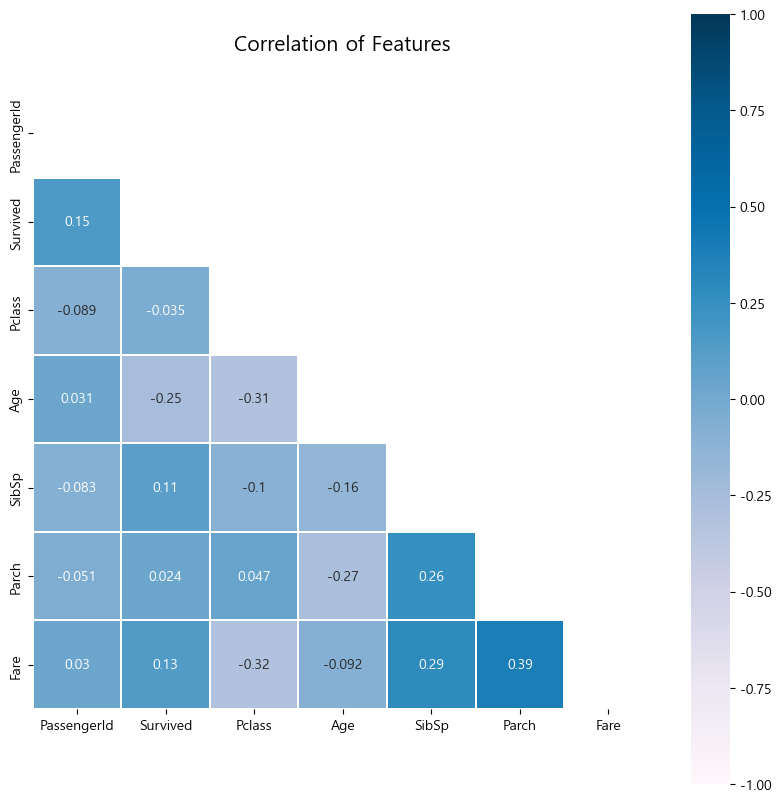

In [27]:
# 히트맵 확인

colormap = plt.cm.PuBu
upp_mat = np.triu(train.select_dtypes(exclude="object").corr("pearson"))
plt.figure(figsize=(10, 10))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(train.select_dtypes(exclude="object").corr("pearson"), linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
                cmap=colormap, linecolor="white", annot=True, mask=upp_mat)


In [29]:
# VIF 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(train.select_dtypes(exclude="object").values, i) for i in range(train.select_dtypes(exclude="object").shape[1])]
vif["features"] = train.select_dtypes(exclude="object").columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,4.137338,PassengerId
1,3.955576,Pclass
2,3.872496,Age
3,3.030641,Survived
4,2.687281,Fare
5,1.827055,Parch
6,1.694785,SibSp


---
## 스케일링

- `MinMaxScaler` : 데이터가 0과 1 사이에 위치하도록 스케일링
- `MaxAbsScaler` : 데이터가 -1과 1 사이에 위치하도록 스케일링
- `StandardScaler` : 데이터의 평균 = 0, 분산 = 1이 되도록 스케일링
- `RobustScaler` : 데이터의 중앙값 = 0, IQR = 1이 되도록 스케일

    from sklearn.preprocessing import StandardScaler

    변형 객체 생성
    std_scaler = StandardScaler()

    훈련데이터의 모수 분포 저장
    std_scaler.fit(X_train)

    훈련 데이터 스케일링
    X_train_scaled = std_scaler.transform(X_train)

    테스트 데이터의 스케일링
    X_test_scaled = std_scaler.transform(X_test)

     스케일링 된 결과 값을 본래 값으로 되돌리.
     X_origin = std_scaler.inverse_transform(X_train_scaled)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.840135,0.698430,-0.372256,0.149065,0.833628,-0.631730,-0.097180
1,-1.832017,0.698430,-0.372256,-0.043230,0.833628,-0.631730,-0.335997
2,-1.819841,-1.431782,-0.372256,1.174636,-0.723044,-0.631730,-0.352250
3,-1.803606,0.698430,3.520480,-2.030273,0.833628,0.697081,-0.814070
4,-1.799547,0.698430,-0.372256,1.431029,-0.723044,-0.631730,-0.684702
...,...,...,...,...,...,...,...
178,1.691045,0.698430,-0.372256,0.725949,0.833628,0.697081,-0.343166
179,1.695104,-1.431782,-0.372256,-0.171426,-0.723044,-0.631730,-0.967737
180,1.723516,0.698430,-0.372256,1.302832,-0.723044,0.697081,0.058785
181,1.755986,0.698430,-0.372256,-1.068801,-0.723044,-0.631730,-0.639390


In [43]:
from sklearn.preprocessing import StandardScaler
scale_std = StandardScaler()
train_1 = train.copy()

train_1_float = train_1.select_dtypes(exclude="object")
train_1_float = scale_std.fit_transform(train_1_float)
train_1_float = pd.DataFrame(train_1_float, columns=train_1.select_dtypes(exclude="object").columns)
train_1_float

for i in train_1_float.columns:
    train_1[i] = train_1_float[i]
    

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale_std = MinMaxScaler()
train_1 = train.copy()

train_1_float = train_1.select_dtypes(exclude="object")
train_1_float = scale_std.fit_transform(train_1_float)
train_1_float = pd.DataFrame(train_1_float, columns=train_1.select_dtypes(exclude="object").columns)
train_1_float

for i in train_1_float.columns:
    train_1[i] = train_1_float[i]
    

In [50]:
train_1 = train.copy()

def scaler(df, tool):
    if tool == StandardScaler:
        scale = StandardScaler()
        train_1_float = df
        train_1_float = scale_std.fit_transform(train_1_float)
        train_1_float = pd.DataFrame(train_1_float, columns=df.columns)
        

    for i in train_1_float.columns:
        train_1[i] = train_1_float[i]
    
    if tool == min:
        scale = MinMaxScaler()
        train_1 = train.copy()

        train_1_float = df
        train_1_float = scale_std.fit_transform(train_1_float)
        train_1_float = pd.DataFrame(train_1_float, columns=df.columns)
        

        for i in train_1_float.columns:
            train_1[i] = train_1_float[i]




In [51]:
scaler(train_1.select_dtypes("float"), min)

UnboundLocalError: local variable 'train_1_float' referenced before assignment